In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Import Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/PORTOFOLIO/data/iris.csv", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Visualize Data

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

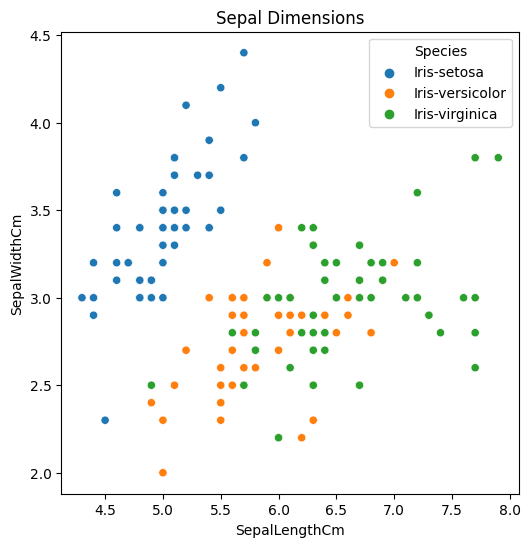

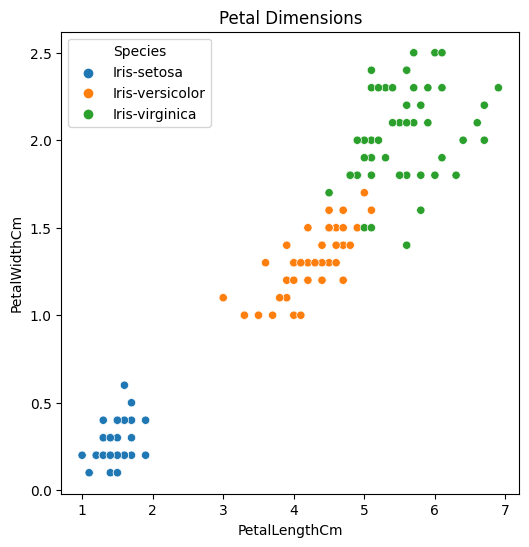

In [8]:
# Create a scatterplot of SepalLengthCm vs SepalWidthCm and PetalLengthCm vs PetalWidthCm
def create_scatterplot(data, x, y, hue, title):
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    sns.scatterplot(x=x, y=y, hue=hue, data=data)
    plt.title(title)

# Create scatterplots for Sepal and Petal attributes
create_scatterplot(df, "SepalLengthCm", "SepalWidthCm", "Species", "Sepal Dimensions")
create_scatterplot(df, "PetalLengthCm", "PetalWidthCm", "Species", "Petal Dimensions")

plt.show()

# Dataset Splitting

In [9]:
X = df.drop(columns="Species")
y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Training

# One vs Rest / One vs All

In [12]:
# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), X_train.columns),
])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class="ovr", solver='lbfgs', n_jobs=-1, random_state=42))
])

# Define grid search parameters
param_grid = {
    'algo__C': [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3],
    'algo__fit_intercept': [True, False]
}

# Create a GridSearchCV model
model = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the best hyperparameters and model scores
print("Best Parameters:", model.best_params_)
print("Training Score:", model.score(X_train, y_train))
print("Validation Score (Best Score):", model.best_score_)
print("Test Score:", model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters: {'algo__C': 100.0, 'algo__fit_intercept': True}
Training Score: 0.9666666666666667
Validation Score (Best Score): 0.9416666666666668
Test Score: 0.9333333333333333


# Multinomial

In [13]:
# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), X_train.columns),
])

# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(multi_class="multinomial", solver='lbfgs', n_jobs=-1, random_state=42))
])

# Define the GridSearchCV with the provided param_grid
model = GridSearchCV(pipeline, param_grid, cv=4, n_jobs=-1, verbose=1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Print the best hyperparameters and model scores
print("Best Parameters:", model.best_params_)
print("Training Score:", model.score(X_train, y_train))
print("Validation Score (Best Score):", model.best_score_)
print("Test Score:", model.score(X_test, y_test))

Fitting 4 folds for each of 14 candidates, totalling 56 fits
Best Parameters: {'algo__C': 10.0, 'algo__fit_intercept': True}
Training Score: 0.975
Validation Score (Best Score): 0.9666666666666667
Test Score: 1.0
